In [2]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw09.ok')

Assignment: Homework 9: Bootstrap, Resampling, CLT
OK, version v1.18.1



# Homework 9: Bootstrap, Resampling, CLT

**Helpful Resource:**
- [Python Reference](http://data8.org/sp21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Reading**: 
* [Estimation](https://inferentialthinking.com/chapters/13/Estimation.html)
* [Why the mean matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Thursday, April 8 at 11:59 P.M. PDT. You will receive an early submission bonus point if you turn in your final submission by Wednesday, April 7 at 11:59 P.M. PDT. Late work will not be accepted as per the [policies](http://data8.org/sp21/policies.html) page.

**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/sp21/office-hours.html](http://data8.org/sp21/office-hours.html).

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('hw09.ok')
_ = ok.auth(inline=True)

Assignment: Homework 9: Bootstrap, Resampling, CLT
OK, version v1.18.1

Successfully logged in as caediseim@berkeley.edu


Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

In [8]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Submit... 100% complete
Submission successful for user: caediseim@berkeley.edu
URL: https://okpy.org/cal/data8/sp21/hw09/submissions/X5WKDW



## 1. Preliminaries

Siméon has collected some data about the amount of time he has to wait in between every encounter of a wild Pokemon in the wild grass of a given area. **`V` is the variance of waiting times in the population. He wants to estimate `V` with the sample he has collected.**

We normally investigate the random variation among our estimates by simulating a sampling procedure from the population many times and computing estimates from each sample that we generate.  In real life, if Siméon had known what the population looked like, he would have known `V` and would not have had any reason to think about random sampling. However, he didn't know what the population looked like, so he couldn't have run the simulations that we normally do. 

Simulating a sampling procedure many times was a useful exercise in *understanding random variation* for an estimate, but it's not as useful as a tool for practical data analysis.

Let's flip that sampling idea on its head to make it practical. **Given *just* a random sample of waiting times, we'll estimate `V`, and then we'll use simulation to find out how accurate our estimate probably is, without ever looking at the whole population.**  This is an example of *statistical inference*.

We (pokemon trainers/Siméon) want to know the variance of the waiting times between encountering wild Pokemon. That number is `V`.

We only see a small number of waiting times (assumed to be a random sample with replacement from among all the waiting times), so we have to use estimation.

#### Question 1.1
Is `V` a population parameter or a statistic?  If we use our random sample to compute a number that is an estimate of `V`, is that a population parameter or a statistic?

Set `V` and `V_estimate` to either the string `"parameter"` or `"statistic"` to indicate whether each value is a parameter or a statistic.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [6]:
V = 'parameter'
V_estimate = 'statistic'

In [7]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



To make the situation realistic, we're going to hide the variance of waiting times from you.  You'll have access only to this random sample:

In [11]:
observations = Table.read_table("waiting_times.csv")
observations

Waiting Time
3
12
9
9
6
4
6
11
7
9


#### Question 1.2
Logically, it makes sense to estimate the variance of the population using the variance of our sample. Write a function that computes that statistic.  It should take as its argument an array of waiting times and return the variance of them.  Call the function `var_based_estimator`.  

After that, use the function and the `observations` table to compute an estimate of `V` called `var_based_estimate`.

As a reminder, the variance of a distribution is the average of the deviations from mean squared.

$$ \text{average of} [(values - mean(values))^2]$$

*Tip*: [This textbook chapter](https://inferentialthinking.com/chapters/14/2/Variability.html) gives a detailed look at calculating variance
<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [12]:
def var_based_estimator(times):
    mean = np.mean(times)
    deviations = times - mean
    squared_deviations = deviations ** 2
    variance = np.average(squared_deviations)
    return variance

var_based_estimate = var_based_estimator(observations.column(0))
var_based_estimate

8.035510857956568

In [13]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1.3
We want to try some different estimators so that we can compare our results to the `var_based_estimator` and see if they're similar. Our friend Gregory is an expert Pokémon player and actually knows what the true distribution is. He gives us a suggestion to try estimating the variance **using the mean**. Although this seems counterintuitive, let's try it out. 

We'll try to estimate `V` by using the mean of values in the sample.  Compute this value using the `observations` table and give it the name `mean_estimate`.

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [14]:
mean_estimate = np.mean(observations.column(0))
mean_estimate

7.952830188679245

In [15]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We can't just confidently proclaim that `mean_estimate` or `var_based_estimate` is equal to `V`.  What if we're really far off?  We want to get a sense of the accuracy of our estimates, which is what we'll do in the section below.

## 2. Resampling
To do this, we'll use resampling.  That is, we won't draw new samples from our population.  Rather we sample from our current sample, or "resample."

Why does that make sense?

When we try to find the value of a population parameter, we ideally would like to use the whole population. However, we often only have access to one sample and we must use that to estimate the parameter instead.

Here, we would like to use the population of waiting times to draw more samples and run a simulation about estimates of `V`.  But we still only have our sample.  So, we **use our sample in place of the population** to run the simulation. We resample from our original sample with replacement as many times as there are elements in the original sample. This resampling technique is called *bootstrapping*. 

Note that in order for bootstrapping to work well, you must start with a large, random sample. Then the Law of Large Numbers says that with high probability, your sample is representative of the population.

#### Question 2.1
Write a function called `simulate_resample`. The function should take one argument `tbl`, which is a table like `observations`. The function should generate and return a resample from the observed waiting times in `tbl`.

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [16]:
def simulate_resample(tbl):
    bootstrap = tbl.sample()
    return bootstrap
simulate_resample(observations) # Don't delete this line

Waiting Time
10
9
6
4
5
5
9
11
11
1


In [17]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



We'll use many resamples at once to see what estimates typically look like.  However, we don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's first answer some questions about our resample.

#### Question 2.2
Which of the following statements are true?

1. The resample can contain waiting times that are not in the original sample.
2. The resample has either zero, one, or more than one copy of each waiting time.
3. The original sample can contain waiting times that are not in the resample.
4. Each observed waiting time occurs exactly once in the original sample.
5. The resample has exactly the same sample size as the original sample.
6. The histogram of a resample can look somewhat different from the histogram of the original sample.

Assign `true_statements` to an **array** of the number(s) corresponding to correct statements.

*Note:* The "original sample" refers to `observations`, and the "resample" refers the output of one call of `simulate_resample()`. 

<!--
BEGIN QUESTION
name: q2_2
manual: false
-->

In [18]:
true_statements = make_array(2, 3, 5, 6)

In [19]:
ok.grade("q2_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now let's write a function to do many resamples at once.

#### Question 2.3
Write a function called `sample_estimates`.  It should take 3 arguments:
1. `waiting_times_tbl`: A table from which the data should be sampled.  The table will look like `observations`. 
2. `statistic`: A *function* that takes in an array of waiting times as its argument and computes a statistic from the array (i.e. returns a calculated number). 
3. `repetitions`: The number of simulations to perform.

*Hint: You should use the function `simulate_resample` which you defined in Question 2.1*

The function should simulate `repetitions` number of samples **with replacement** from the given table. For each of those samples, it should compute the statistic on that sample. Then it should **return an array** containing each of those statistics.  The code below provides an example use of your function and describes how you can verify that you've written it correctly.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

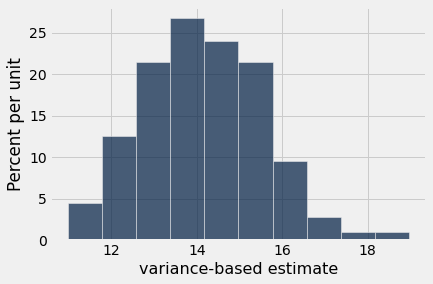

In [20]:
def sample_estimates(waiting_times_tbl, statistic, repetitions):
    stat_arr = make_array()
    for i in np.arange(repetitions):
        stat_arr = np.append(stat_arr, statistic(simulate_resample(waiting_times_tbl).column(0)))
    return stat_arr

# DON'T CHANGE THE CODE BELOW THIS COMMENT! (If you do, you will fail the hidden test.)
# This is just an example to test your function.
# This should generate an empirical histogram of var-based estimates
# of V from samples of size 200 if V is 15.  This should be very roughly bell shaped and centered at about 14-15
# answer, make sure that's what you see!
num_repetitions = 500
population = Table.read_table("population_waiting_times.csv").relabeled("Waiting Times", "Waiting Time")
one_sample = Table.read_table("one_sample.csv").relabeled("Waiting Times", "Waiting Time") #This is a sample from the population table
example_estimates = sample_estimates(
    one_sample,
    var_based_estimator,
    num_repetitions)
Table().with_column("variance-based estimate", example_estimates).hist()

In [21]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now we can go back to the sample we actually observed (the table `observations`) and estimate how much our var-based estimate of `V` would have varied from sample to sample.

#### Question 2.4
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *var-based estimates* of `V`.  Use 8000 replications and save the estimates in an array called `bootstrap_var_based_estimates`.  

We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

*Hint:* What function did you previously define to compute variance-based estimates?

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

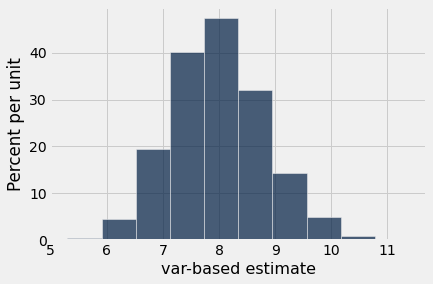

In [22]:
bootstrap_var_based_estimates = sample_estimates(observations,  var_based_estimator, 8000)

# Don't change the code below! This plots bootstrap_mean_based_estimates.
Table().with_column("var-based estimate", bootstrap_var_based_estimates).hist(bins=10) 

In [23]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.5
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *mean estimates* of `V`.  Use 8000 replications and save the estimates in an array called `bootstrap_mean_estimates`.

We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

*Hint:* Similar to the question above, you should pass in a function as your second argument. In this case, you want **mean** estimates.

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

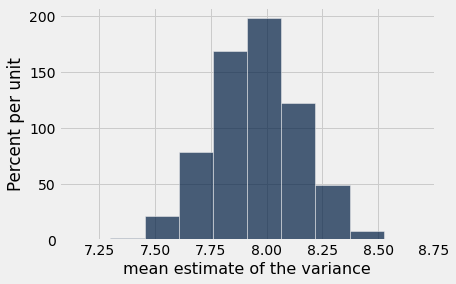

In [24]:
bootstrap_mean_estimates = sample_estimates(observations, np.mean, 8000)

# Don't change the code below! This plots bootstrap_max_estimates.
Table().with_column("mean estimate of the variance", bootstrap_mean_estimates).hist(bins=10) 

In [25]:
ok.grade("q2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.6
`V` was actually 8! Recall that **`V` is the population variance**. Compare the histograms of estimates you generated in 2.4 and 2.5 and answer the following questions:

1. How does the distribution of values for the mean-based estimates differ from the variance based estimates? Do both distributions contain the true variance value?
2. Which estimator do you think will work well for other distributions? Do you think a sample mean estimator will always be a good estimate for the population variance?

*Hint: Is the mean always equal to the variance?*

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->
<!-- EXPORT TO PDF -->

1. The distribution of values for the variance based estimates has a larger spread and is wider and has larger bins than that of the mean-based estimates which are more centered around the true value of V which is 8. However, both do contain the true variance value of 8.

2. The variance based estimates would work well for other distributions. No sample mean estimator wont always be a good estimate for population variance because it will only be a good estimate for population distributions that follow the Poisson distribution.

It turns out the distribution of waiting times in the population follows a very special distribution called the Poisson distribution! Named after French mathematician Baron Siméon Denis Poisson, this distribution has an equal mean and variance. If you go onto to future data science/probability/statistics classes such as Prob 140, you will surely see this distribution! **The Poisson distribution is out of scope for this class.**

## 3. Computing Intervals

#### Question 3.1
Compute an interval that covers the middle 95% of the **var-based bootstrap estimates**.  Assign your values to `left_end_1` and `right_end_1`. 

*Hint:* Use the `percentile` function! Read up on its documentation [here](http://data8.org/fa20/python-reference.html).

Verify that your interval looks like it covers 95% of the area in the histogram. The red dot on the histogram is the value of the parameter (8).

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

Middle 95% of bootstrap estimates: [6.455389, 9.696578]


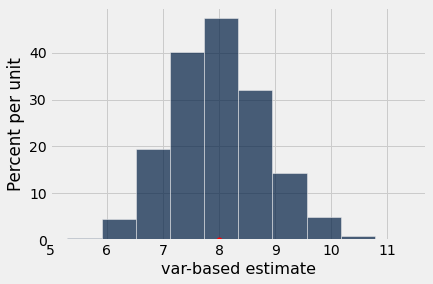

In [26]:
left_end_1 = percentile(2.5, bootstrap_var_based_estimates)
right_end_1 = percentile(97.5, bootstrap_var_based_estimates)
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(left_end_1, right_end_1))

# Don't change the code below! It draws your interval and V on the histogram of var-based estimates.
import matplotlib.pyplot as plt
Table().with_column("var-based estimate", bootstrap_var_based_estimates).hist(bins=10) 
plt.plot(make_array(left_end_1, right_end_1), make_array(0, 0), color='yellow', lw=3, zorder=1)
plt.scatter(8, 0, color='red', s=30, zorder=2);

In [27]:
ok.grade("q3_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3.2
Write code that simulates the sampling and bootstrapping process again, as follows:

1. Generate a new set of random observations that Siméon might have seen by sampling from the `population` table we have created for you below. Your sample should have the same number of rows as the original `observations` sample.
2. Compute an estimate of `V` from these new observations, using `var_based_estimator`.
3. Using only the new observations, compute 10,000 bootstrap estimates of `V`. You can use a function you previously defined to do this.
4. Plot these bootstrap estimates (this line of code is given to you) and compute an interval covering the middle 95%.

*Note:* Traditionally, when we bootstrap using a sample from the population, that sample is usually a simple random sample (i.e., sampled uniformly at random from the population without replacement). However, if the population size is big enough, the difference between sampling with replacement and without replacement is negligible. Think about why that's the case! This is why when we define `new_observations`, we sample with replacement.

<!--
BEGIN QUESTION
name: q3_2
manual: false
-->

New var-based estimate: 8.221142
Middle 95% of bootstrap estimates: [6.597966, 10.013951]


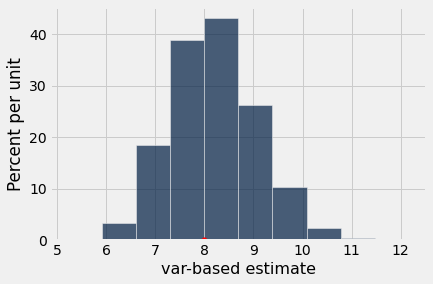

In [47]:
# DO NOT CHANGE THESE LINES
from scipy.stats import poisson
population = Table().with_column("waiting times", poisson.rvs(mu=8, size=100000))
# YOUR CODE BELOW HERE

new_observations = population.sample(observations.num_rows)
new_var_based_estimate = var_based_estimator(new_observations.column(0))
new_bootstrap_estimates = sample_estimates(new_observations, var_based_estimator, 10000)
Table().with_column("var-based estimate", new_bootstrap_estimates).hist(bins=10)
new_left_end = percentile(2.5, new_bootstrap_estimates)
new_right_end = percentile(97.5, new_bootstrap_estimates)

# Don't change code below this line!
print("New var-based estimate: {:f}".format(new_var_based_estimate))
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(new_left_end, new_right_end))

plt.plot(make_array(new_left_end, new_right_end), make_array(0, 0), color='yellow', lw=3, zorder=1)
plt.scatter(8, 0, color='red', s=30, zorder=2);

In [48]:
ok.grade("q3_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3.3
Does the interval covering the middle 95% of the new bootstrap estimates include `V`?  If you ran that cell 1000 times and generated 1000 intervals, how many of those intervals would you expect to include `V`? 

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->
<!-- EXPORT TO PDF -->

Yes the interval covering the middle 95% of the new bootstrap estimates includes V. If the cell was run 1000 times, I would expect 950 of the intervals to contain V.

Let's look at what happens when we use a small number of resamples:

<img src="smallrepvarhist.png" width="525"/>

This histogram and confidence interval was generated using 10 resamples of `new_observations`.

#### Question 3.4
In the cell below, explain why this histogram and confidence interval look different from the ones you generated previously in Question 3.2 where the number of resamples was 10,000.

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

These look different from the ones generated previously because since we are bootstrapping we should be resampling as many times as the original sample size to resemble the original sample and thus the population. The ones generated in question 3.2 resemble the population by the law of averages but using a small number of resamples does not resemble the population and creates more variability in the estimate which is represented by the variability in the histogram and confidence interaval.

## 4. The CLT and Book Reviews

Your friend has recommended you a book, so you look for it on an online marketplace. You decide to look at reviews for the book just to be sure that it's worth buying. Let's say that on Amazon, the book only has 80% positive reviews. On GoodReads, it has 95% positive reviews. You decide to investigate a bit further by looking at the percentage of positive reviews for the book on 5 different websites that you know of, and you collect these positive review percentages in a table called `reviews.csv`.

Here, we've loaded in the table for you.

In [49]:
reviews = Table.read_table("reviews.csv") 
reviews

Positive Review Percentage
80
96
33
65
95


**Question 4.1**. Calculate the average percentage of positive reviews from your sample and assign it to `initial_sample_mean`.

<!--
BEGIN QUESTION
name: q4_1
manual: false
-->

In [55]:
initial_sample_mean = np.average(reviews.column(0))
initial_sample_mean

73.8

In [56]:
ok.grade("q4_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You've calculated the average percentage of positive reviews from your sample, so now you want to do some inference using this information. 

**Question 4.2**. First, simulate 5000 bootstrap resamples of the positive review percentages. For each bootstrap resample, calculate the resample mean and store the resampled means in an array called `resample_positive_percentages`. Then, plot a histogram of the resampled means.

<!--
BEGIN QUESTION
name: q4_2
manual: false
-->

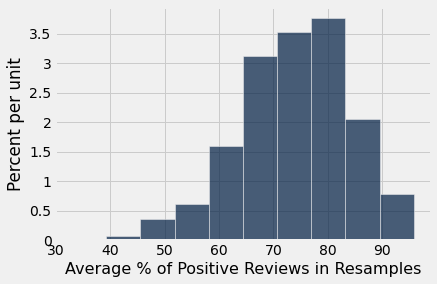

In [64]:
resample_positive_percentages = make_array()

for i in np.arange(5000):
    resample = reviews.sample()
    resample_avg_positive = np.average(resample.column(0))
    resample_positive_percentages = np.append(resample_positive_percentages, resample_avg_positive)
    
# Do NOT change these lines.
(Table().with_column("Average % of Positive Reviews in Resamples", 
                     resample_positive_percentages).hist("Average % of Positive Reviews in Resamples"))

In [63]:
ok.grade("q4_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



According to the Central Limit Theorem, the probability distribution of the sum or average of a *large random sample* drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn. 

**Question 4.3**. Note the statement about the sample being large and random. Is this sample large and random? Give a brief explanation.

*Note: The setup at the beginning of this exercise explains how the sample was gathered.*

<!--
BEGIN QUESTION
name: q4_3
manual: true
-->
<!-- EXPORT TO PDF -->

No this sample is not large and random because they only took the samples from 5 websites and they were not taken randomnly either.

**Question 4.4**. What is the the shape of the empirical distribution of the average percentage of positive reviews based on our original sample? What value is the distribution centered at? Assign your answer to the variable `initial_sample_mean_distribution`--your answer should be either `1`, `2`, `3`, or `4` corresponding to the following choices:

*Hint: Look at the histogram you made in Question 4.2. Run the cell that generated the histogram a few times to check your intuition.*

1. The distribution is approximately normal because of the Central Limit Theorem, and it is centered at the original sample mean.
2. The distribution is not necessarily normal because the Central Limit Theorem may not apply, and it is centered at the original sample mean.
3. The distribution is approximately normal because of the Central Limit Theorem, but it is not centered at the original sample mean.
4. The distribution is not necessarily normal because the Central Limit Theorem may not apply, and it is not centered at the original sample mean.

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [81]:
initial_sample_mean_distribution = 2

In [82]:
ok.grade("q4_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Though you have an estimate of the true percentage of positive reviews (the sample mean), you want to measure how variable this estimate is. 

**Question 4.5**. Find the standard deviation of your resampled average positive review percentages, which you stored in `resample_positive_percentages`, and assign the result to the variable `resampled_means_variability`.

A convenient way to calculate standard deviation is found [here](https://www.inferentialthinking.com/chapters/14/2/Variability.html#Standard-Deviation) in the textbook. You can also read up on how it relates to variance.

<!--
BEGIN QUESTION
name: q4_5
manual: false
-->

In [67]:
resampled_means_variability = np.std(resample_positive_percentages)
resampled_means_variability

10.47761109986432

In [68]:
ok.grade("q4_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



This estimate is pretty variable! To make the estimate less variable, let's say you found a way to randomly sample reputable marketplaces from across the web which sell this book. Let's say that there are up to 150 of these marketplaces. The percentages of positive reviews are loaded into the table `more_reviews`.

In [69]:
# Just run this cell
more_reviews = Table.read_table("more_reviews.csv")
more_reviews

Positive Review Percentage
75
79
90
73
92
86
100
100
64
61


In the next few questions, we'll test an important result of the Central Limit Theorem. According to the CLT, the standard deviation of all possible sample means can be calculated using the following formula:

$$
\text{SD of all possible sample means} = \dfrac{\text{Population SD}}{\sqrt{\text{sample size}}}
$$

This formula gives us another way to approximate the SD of the sample means other than calculating it empirically. We can test how well this formula works by calculating the SD of sample means for different sample sizes.

The following code calculates the SD of sample means using the CLT and empirically for a range of sample sizes. Then, it plots a scatter plot comparing the SD of the sample means calculated with both methods. Each point corresponds to a different sample size. 

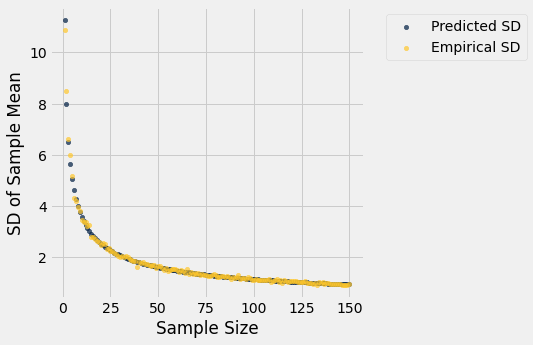

In [70]:
# Just run this cell. It's not necessary for you to read this code, but you can do 99% of this on your own!
# Note: this cell might take a bit to run.

def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = more_reviews.sample(n).column('Positive Review Percentage') 
        sample_mean = np.mean(sample) 
        sample_means = np.append(sample_means, sample_mean) 
    return np.std(sample_means)

def predict_sample_mean_sd(n):
    return np.std(more_reviews.column(0)) / (n**0.5)

sd_table = Table().with_column('Sample Size', np.arange(1,151))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')
plt.ylabel("SD of Sample Mean");

Often times, when conducting statistical inference, you'll want your estimate of a population parameter to have a certain accuracy. It is common to measure accuracy of an estimate using the SD of the estimate--as the SD goes down, your estimate becomes less variable. As a result, the width of the confidence interval for your estimate decreases (think about why this is true). We know from the Central Limit Theorem that when we estimate a sample mean, the SD of the sample mean decreases as the sample size increases (again, think about why this is true).   

**Question 4.6**. Assign the numbers corresponding to all true statements to an array called `sample_mean_sd_statements`. 

**Note**: This [section](https://www.inferentialthinking.com/chapters/10/2/Sampling_from_a_Population.html) of the textbook illustrates an example of the Law of Large Numbers at work. Note that the Law of Large Numbers is the same as the Law of Averages.

1. The law of large numbers tells us that the distribution of a large random sample should resemble the distribution from which it is drawn.
2. The law of large numbers guarantees that empirical and predicted sample mean SDs will be exactly equal to each other when the sample size is large.
3. The law of large numbers guarantees that empirical and predicted sample mean SDs will be approximately equal to each other when the sample size is large.
4. The plot above shows that as our sample size increases, our estimate for the true percentage of positive reviews becomes more accurate.
5. The plot above shows that the size of the population affects the SD of the sample means.
6. The SD of the sample means is proportional to the square root of the sample size. 
7. The SD of the sample means is proportional to 1 divided by the square root of the sample size. 

<!--
BEGIN QUESTION
name: q4_6
manual: false
-->

In [83]:
sample_mean_sd_statements = make_array(1, 3, 4, 7)

In [84]:
ok.grade("q4_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.7**. Imagine you are asked to estimate the true average percentage of positive reviews for this book and you have not yet taken a sample of review websites. Which of these is the best way to decide how large your sample should be to achieve a certain level of accuracy for your estimate of the true average percentage of positive reviews? Assign `sample_size_calculation` to either `1`, `2`, or `3` corresponding to the statements below.

*Note: Assume you know the population SD or can estimate it with reasonable accuracy.*
1. Take many random samples of different sizes, then calculate empirical confidence intervals using the bootstrap until you reach your desired accuracy. 
2. Use the Central Limit Theorem to calculate what sample size you need in advance. 
3. Randomly pick a sample size and hope for the best.

<!--
BEGIN QUESTION
name: q4_7
manual: false
-->

In [79]:
sample_size_calculation = 2

In [78]:
ok.grade("q4_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 5. Parametric Bootstrapping [OPTIONAL]
### All the following content is explicitly **NOT** in scope for this class. We just think it's a fun preview of future material you may encounter as a data scientist.

In this class we bootstrap by resampling from our sample. In broader statistics, this is called a "non-parametric boostrap". That is, we don't know the distribution or make a guess about the parameter to generate our resamples, we just use the sample as a representation of the population.

It turns out there's another kind of boostrapping one can do, called a "parametric boostrap". (parametric- involving a parameter).

In future data science classes you will see how different distributions, such as a normal distribution, or the poisson distribution we looked at in this assignment, are defined by mathematical formulas. These distributions are defined by their specific values, parameters. This is the same kind of parameter as we refer to in this class!

As an example, one can define a poisson distribution by a single value, often refered to as lambda, or mu (these are names of greek letters m and l). This value sets the mean of the distribution and the variance of the distribution (equal values). 

Run the following cell to see the distribution of a poisson variable with different parameter lambda.

In [60]:
# Change the value of parameter! It must be > 0.
parameter = 4.2
# Don't change these lines below
from scipy.stats import poisson
samples = poisson.rvs(mu=parameter, size=5000)
Table().with_column("Sampled Values", samples).hist(bins=np.arange(max(samples)))
print(f"Mean of samples: '{np.mean(samples)}, Variance of samples: '{np.var(samples)}'")

So how does the parametric bootstrap work? We sample some data, like normal, (non-parametric) bootstrapping. Then, instead of resampling from this data, we instead guess the distribution of our population, for exmaple, guessing that it is normal or poisson, and then we make a guess for the parameters of that distribution using our sample.

We then draw resamples from the population defined by this distribution that we guessed at, instead of from our sample data. We can use these resample to calculate CIs just as we would with our original resamples.

In [61]:
# Let's use the observations table!
guess_at_variance = np.var(observations.column(0))
# We are going to use that as our parameter for generating the distribution, 
# and we are going to use a poisson distribution as our guess for the shape.

# Let's walk through the bootstrap process now!
bootstrapped_variances = make_array()
num_sims = 1000
np.random.seed(8) # DO NOT CHANGE THIS LINE; This makes sure the random numbers you get are predictable
for i in np.arange(num_sims):
    sample = poisson.rvs(mu=guess_at_variance, size=observations.num_rows) # This samples from the distribution we guessed
    bootstrapped_variances = np.append(bootstrapped_variances, np.var(sample))

Awesome! Now let's look at the confidence interval we generated using that method.

In [62]:
print(f"95% CI Lower Bound {percentile(2.5, bootstrapped_variances)} Upper Bound {percentile(97.5, bootstrapped_variances)}")

We generated a CI contains the true parameter, 8, just like when we could do with a normal (non-parametric) bootstrapping!

Hopefully this material is interesting! Remember this is completely out of scope! If you have any questions about this material please use the piazza thread and not office hours.

## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. **IMPORTANT: Make sure to check that your submission is not empty. We cannot guarantee that the submission will be valid, so please check it now.** If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

**NOTE:** The tests that are provided are not comprehensive and act as sanity checks (i.e. to make sure you answer is in the correct form, etc.). Passing the tests for a question does not mean that you answered the question correctly.

In [4]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw09.ipynb'.
Submit... 100% complete
Submission successful for user: caediseim@berkeley.edu
URL: https://okpy.org/cal/data8/sp21/hw09/submissions/x1gMk9



In [5]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q1_1 > Suite 1 > Case 1

>>> V == "parameter" or V == "statistic"
NameError: name 'V' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'V' is not defined

Run only this test case with "python3 ok -q q1_1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q1_2 > Suite 1 > Case 1

>>> var_based_estimator(make_array(1, 2, 3)) is not None
NameError: name 'var_based_estimator' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ..


Run only this test case with "python3 ok -q q4_4 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q4_5 > Suite 1 > Case 1

>>> type(resampled_means_variability) in set([float, np.float32, np.float64])
NameError: name 'resampled_means_variability' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'resampled_means_variability' is not defined

Run only this test case with "python3 ok -q q4_5 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

--------------------